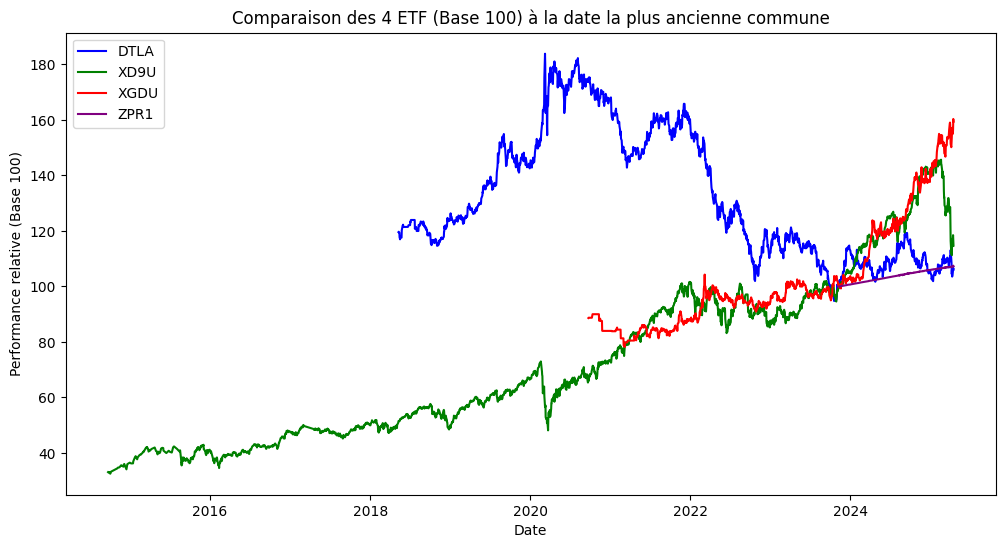

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# --- Connexion à la base de données SQLite ---
db_path = "../data/etf_data.db"  # Remplace par le chemin de ta base de données
engine = create_engine(f"sqlite:///{db_path}")

# Exemple de dataframe contenant les prix de clôture des 4 ETF
df_dtla = pd.read_sql_table("dtla_l", con=engine)
df_xd9u = pd.read_sql_table("xd9u_mi", con=engine)
df_xgdu = pd.read_sql_table("xgdu_mi", con=engine)
df_zpr1 = pd.read_sql_table("zpr1_de", con=engine)

# Conversion des dates en index et tri des données
df_dtla['Date'] = pd.to_datetime(df_dtla['Date'])
df_dtla.set_index('Date', inplace=True)
df_dtla.sort_index(inplace=True)

df_xd9u['Date'] = pd.to_datetime(df_xd9u['Date'])
df_xd9u.set_index('Date', inplace=True)
df_xd9u.sort_index(inplace=True)

df_xgdu['Date'] = pd.to_datetime(df_xgdu['Date'])
df_xgdu.set_index('Date', inplace=True)
df_xgdu.sort_index(inplace=True)

df_zpr1['Date'] = pd.to_datetime(df_zpr1['Date'])
df_zpr1.set_index('Date', inplace=True)
df_zpr1.sort_index(inplace=True)

# Calcul de la date la plus ancienne commune parmi les 4 ETF
start_date = max(df_dtla.index.min(), df_xd9u.index.min(), df_xgdu.index.min(), df_zpr1.index.min())

# Normalisation à base 100
df_dtla['Base_100'] = (df_dtla['Close'] / df_dtla.loc[start_date, 'Close']) * 100
df_xd9u['Base_100'] = (df_xd9u['Close'] / df_xd9u.loc[start_date, 'Close']) * 100
df_xgdu['Base_100'] = (df_xgdu['Close'] / df_xgdu.loc[start_date, 'Close']) * 100
df_zpr1['Base_100'] = (df_zpr1['Close'] / df_zpr1.loc[start_date, 'Close']) * 100

# Tracer les courbes normalisées (base 100)
plt.figure(figsize=(12, 6))

plt.plot(df_dtla.index, df_dtla['Base_100'], label='DTLA', color='blue')
plt.plot(df_xd9u.index, df_xd9u['Base_100'], label='XD9U', color='green')
plt.plot(df_xgdu.index, df_xgdu['Base_100'], label='XGDU', color='red')
plt.plot(df_zpr1.index, df_zpr1['Base_100'], label='ZPR1', color='purple')

plt.title("Comparaison des 4 ETF (Base 100) à la date la plus ancienne commune")
plt.xlabel("Date")
plt.ylabel("Performance relative (Base 100)")
plt.legend()

plt.show()


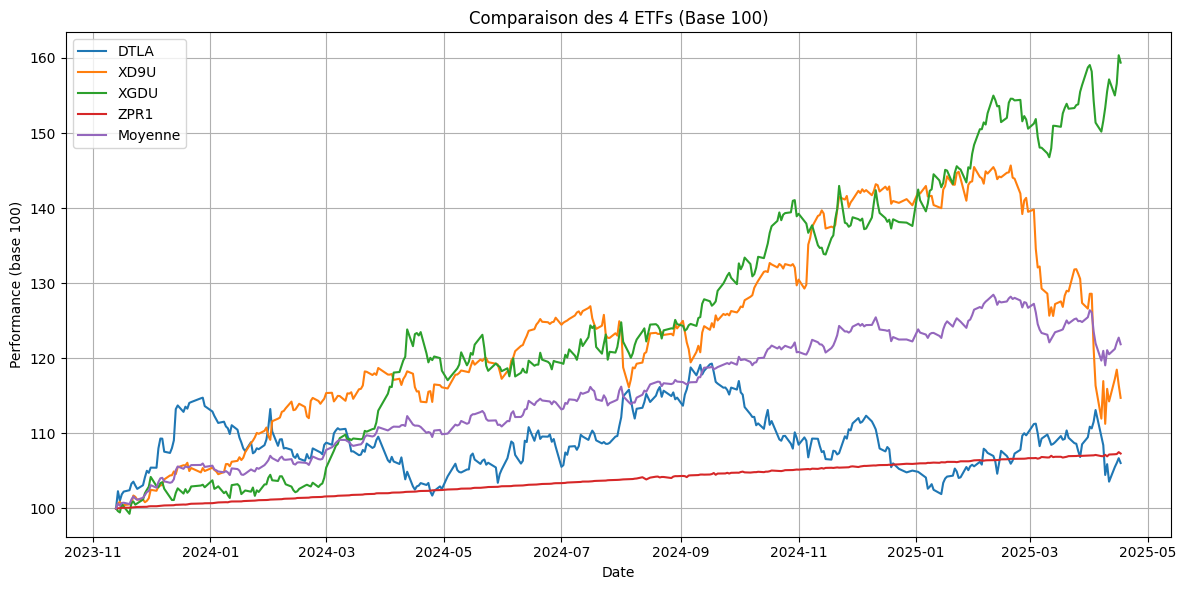

In [10]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Connexion à la base
conn = sqlite3.connect("../data/etf_data.db")

# Chargement des 4 tables
df_dtla = pd.read_sql("SELECT Date, Close FROM dtla_l", conn, parse_dates=["Date"]).set_index("Date")
df_xd9u = pd.read_sql("SELECT Date, Close FROM xd9u_mi", conn, parse_dates=["Date"]).set_index("Date")
df_xgdu = pd.read_sql("SELECT Date, Close FROM xgdu_mi", conn, parse_dates=["Date"]).set_index("Date")
df_zpr1 = pd.read_sql("SELECT Date, Close FROM zpr1_de", conn, parse_dates=["Date"]).set_index("Date")

# Alignement des dates communes
df_all = pd.concat([
    df_dtla.rename(columns={"Close": "DTLA"}),
    df_xd9u.rename(columns={"Close": "XD9U"}),
    df_xgdu.rename(columns={"Close": "XGDU"}),
    df_zpr1.rename(columns={"Close": "ZPR1"})
], axis=1)

df_all.dropna(inplace=True)  # supprime les dates incomplètes

# Conversion en base 100
df_base100 = df_all / df_all.iloc[0] * 100

# Moyenne des 4 ETFs
df_base100["Moyenne"] = df_base100.mean(axis=1)

# Affichage
plt.figure(figsize=(12, 6))
for col in df_base100.columns:
    plt.plot(df_base100.index, df_base100[col], label=col)

plt.title("Comparaison des 4 ETFs (Base 100)")
plt.xlabel("Date")
plt.ylabel("Performance (base 100)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
